In [6]:
import numpy as np
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Optimal x: 1.2499996131206406


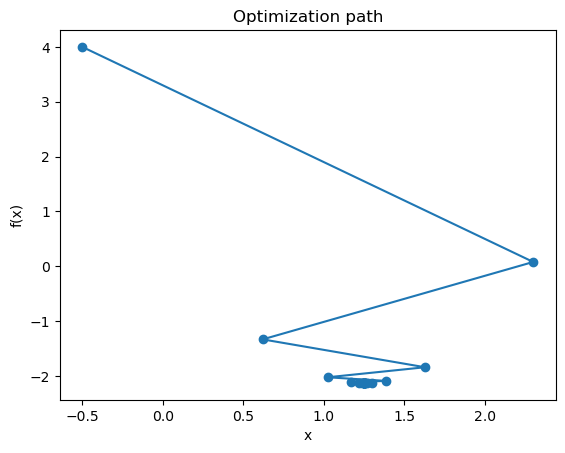

Best x: 1.2499996131206406
Best f(x): -2.1249999999997002


In [7]:
## Optimize simple function 2x² + 3x + 1 with gradient descent
# Define the function
def f(x):
    return 2*x**2 - 5*x + 1

# Define the gradient
def df(x):
    return 4*x - 5

# Define the learning rate
lr = 0.4

# Define the initial guess
x = -0.5

# Define the number of iterations
n_iter = 30

# Perform the optimization
xs = [x]
fs = [f(x)]
for i in range(n_iter):
    x = x - lr * df(x)
    xs.append(x)
    fs.append(f(x))

# Print the result
print(f"Optimal x: {x}")

# Plot the optimization path
import matplotlib.pyplot as plt
plt.plot(xs, [f(x) for x in xs], 'o-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization path')
plt.show()

# Print best x and it's function value
xmin = x
print(f"Best x: {xmin}")
print(f"Best f(x): {f(xmin)}")

In [8]:
%%manim -qh OptimizationManim

class OptimizationManim(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range = [-5, 5, 0.5],
            y_range = [-5, 5, 0.5],
            x_length=6,
            y_length=6,
            #axis_config={"numbers_to_include": [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1], "font_size": 24},
            axis_config={"numbers_to_include": [-5, 1, 5], "font_size": 24},
            tips=False
        )

        y_label = plot_axes.get_y_axis_label("y")
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)
        self.add(plot_axes, plot_labels)

        x = np.linspace(-1, 1, 100)
        f_x = f(x)

        xmin = 1.25

        #dot = Dot(plot_axes.c2p(xmin, f(xmin), 0), color=RED)

        dots = VGroup(*[
            Dot(plot_axes.c2p(x, f, 0), color=YELLOW) for x, f in zip(xs, fs)
        ])

        self.play(Create(plot_axes.plot(lambda x: f(x), color=BLUE, x_range=[-4, 4])), run_time=1.5)
        self.wait(0.25)

        for i in range(len(dots)):
            #new_dot = Dot(plot_axes.c2p(xx, fx, 0), color=YELLOW)
            self.add(TracedPath(dots[i].get_center, stroke_color=dots[i].get_color()))
            self.play(Transform(dots[i], dots[i+1]), run_time=0.5)
            if i == 8:
                break

        self.wait(0.5)

        #self.add(*[Mobject.add_updater(dot, lambda x: update_dot(dot, x)) for x in xs])



Manim Community v0.18.1

Optimal x: [-1.23794004e-03  1.12696701e-05]
Best x: [-1.23794004e-03  1.12696701e-05]
Best f(x): 1.0000030653720982


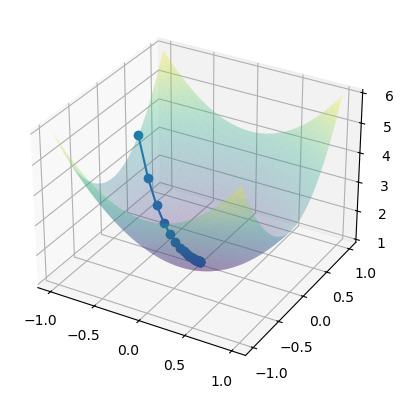

In [9]:
# Optimization of a simple function with two variables

## Optimize simple function 2x² + 3y² + 1 with gradient descent
# Define the function
def f(x):
    return 2*x[0]**2 + 3*x[1]**2 + 1

# Define the gradient
def df(x):
    return np.array([4*x[0], 6*x[1]])

# Define the learning rate
lr = 0.05

# Define the initial guess
x = np.array([-1.0, 0.5])

# Define the number of iterations
n_iter = 30

# Perform the optimization
xs = [x]
fs = [f(x)]

for i in range(n_iter):
    x = x - lr * df(x)
    xs.append(x)
    fs.append(f(x))

# Print the result
print(f"Optimal x: {x}")

# Print best x and it's function value
xmin = x
print(f"Best x: {xmin}")
print(f"Best f(x): {f(xmin)}")

# Plot the optimization path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

xs = np.array(xs)
fs = np.array(fs)
ax.plot(xs[:, 0], xs[:, 1], fs, 'o-')

# Plot also the function itself, not only the optimization path
ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

plt.show()




In [34]:
config.disable_caching = True

In [35]:
%%manim -qh OptimizationManim3D

class OptimizationManim3D(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=1, theta=-1, zoom=0.5)
        axes = ThreeDAxes(
            x_range = [-1, 1, 0.25],
            y_range = [-1, 1, 0.25],
            z_range = [0, 6, 1]
        )
        # labels = axes.get_axis_labels(
        #     Text("x-axis").scale(0.7), Text("y-axis").scale(0.45), Text("z-axis").scale(0.45)
        # )
        # self.add(axes, labels)

        self.add(axes)

        surface = Surface(
            lambda u, v: axes.c2p(*[u, v, f([u, v])]), u_range=[-1, 1], v_range=[-1, 1], color=BLUE, fill_opacity=0.4
        )

        #self.play(Create(surface), run_time=2)
        self.add(surface)
        self.wait(1)


        dots = VGroup(*[
            Dot3D(axes.c2p(x[0], x[1], z), color=YELLOW) for x, z in zip(xs, fs)
        ])

        for dot in dots:
            self.add(TracedPath(dot.get_center, stroke_color=dot.get_color()))

        for i in range(len(dots - 1)):
            #new_dot = Dot(plot_axes.c2p(xx, fx, 0), color=YELLOW)
            self.play(Transform(dots[i], dots[i+1], run_time=fs[i] / 4))
            if i == 8:
                break

Manim Community v0.18.1

In [20]:
xs

array([[-1.00000000e+00,  5.00000000e-01],
       [-8.00000000e-01,  3.50000000e-01],
       [-6.40000000e-01,  2.45000000e-01],
       [-5.12000000e-01,  1.71500000e-01],
       [-4.09600000e-01,  1.20050000e-01],
       [-3.27680000e-01,  8.40350000e-02],
       [-2.62144000e-01,  5.88245000e-02],
       [-2.09715200e-01,  4.11771500e-02],
       [-1.67772160e-01,  2.88240050e-02],
       [-1.34217728e-01,  2.01768035e-02],
       [-1.07374182e-01,  1.41237625e-02],
       [-8.58993459e-02,  9.88663371e-03],
       [-6.87194767e-02,  6.92064360e-03],
       [-5.49755814e-02,  4.84445052e-03],
       [-4.39804651e-02,  3.39111536e-03],
       [-3.51843721e-02,  2.37378075e-03],
       [-2.81474977e-02,  1.66164653e-03],
       [-2.25179981e-02,  1.16315257e-03],
       [-1.80143985e-02,  8.14206799e-04],
       [-1.44115188e-02,  5.69944759e-04],
       [-1.15292150e-02,  3.98961331e-04],
       [-9.22337204e-03,  2.79272932e-04],
       [-7.37869763e-03,  1.95491052e-04],
       [-5.

In [21]:
fs

array([3.75      , 2.6475    , 1.999275  , 1.61252475, 1.37878033,
       1.23593401, 1.14781992, 1.0930476 , 1.05878747, 1.03725011,
       1.02365687, 1.01505063, 1.00958842, 1.00611504, 1.00390306,
       1.00249278, 1.00159285, 1.00101818, 1.00065103, 1.00041636,
       1.00026632, 1.00017038, 1.00010901, 1.00006975, 1.00004463,
       1.00002856, 1.00001828, 1.0000117 , 1.00000748, 1.00000479,
       1.00000307])